<a href="https://colab.research.google.com/github/roniel06/python_ml_exc/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent 
Author: Roniel Polanco
<br/>

Based in FuseMachines Resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sympy as sp

%matplotlib inline

## Simple cost function

## $f(x)= x^{2} +x +1$

In [2]:
def f(x):
    return x**2 + x +1

In [3]:
# Data Making

x_1 = np.linspace(-3,3, num=500)


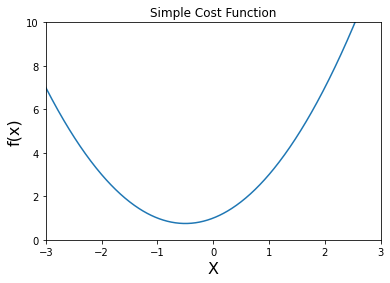

In [4]:
plt.title('Simple Cost Function')
plt.xlim([-3,3])
plt.ylim([-0,10])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Minimize f(x)

## Slope & Derivative

In [5]:
def df(x):
    return 2 * x +1

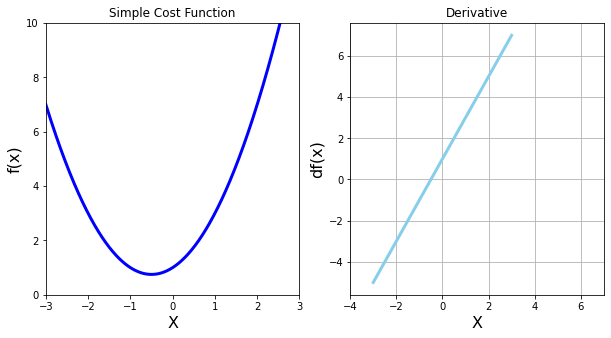

In [6]:
plt.figure(figsize=[10,5])

plt.subplot(121)


plt.title('Simple Cost Function')
plt.xlim([-3,3])
plt.ylim([-0,10])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#Chart 2
plt.subplot(122)
plt.title('Derivative')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-4,3])
plt.xlim([-4,7])
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)

plt.show()

## Start Working with Gradient Descent

Here we want to find the minimum of the function


In [7]:
#Brute Force Approach
new_x = 3
previous_x =0
step_multiplier =0.1

for n in range(1000000):
    previous_x= new_x
    gradient = df(previous_x)
    new_x= previous_x - step_multiplier * gradient
    
print('Local Minumum at: ', new_x)
print('Slope or value df(x): ', df(new_x))
print('f(x) or cost is: ', f(new_x))

Local Minumum at:  -0.4999999999999999
Slope or value df(x):  2.220446049250313e-16
f(x) or cost is:  0.75


## Second Form


In [8]:
#Brute Force Approach
new_x = 3
previous_x =0
step_multiplier =0.1
precision = 0.00001


x_list = [new_x]
slope_list = [df(new_x)]

for n in range(1000000):
    previous_x= new_x
    gradient = df(previous_x)
    new_x= previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x) #update list
    slope_list.append(df(new_x)) #update list
    
    if step_size < precision:
        print('Times:', n)
        break
    
print('Local Minumum at: ', new_x)
print('Slope or value df(x): ', df(new_x))
print('f(x) or cost is: ', f(new_x))

Times: 50
Local Minumum at:  -0.49996003706460423
Slope or value df(x):  7.992587079153068e-05
f(x) or cost is:  0.7500000015970362


## Superimpose Gradient


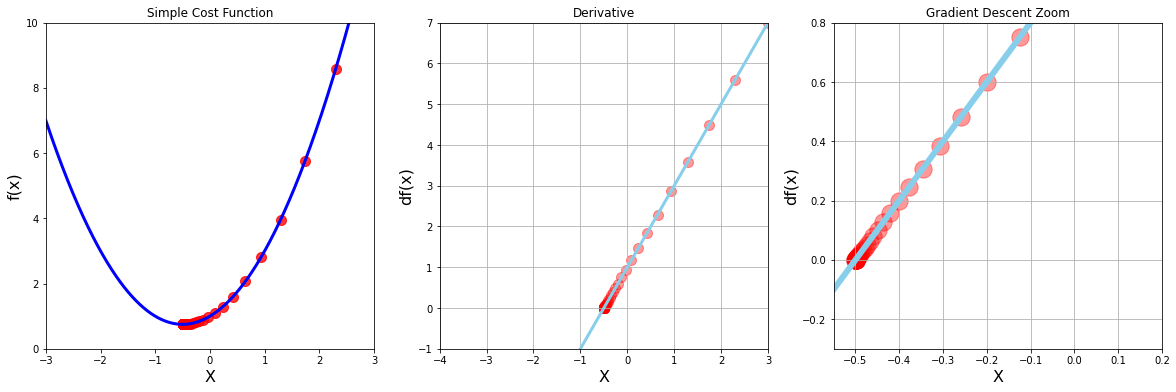

In [9]:

plt.figure(figsize=[20,6])

plt.subplot(131)


plt.title('Simple Cost Function')
plt.xlim([-3,3])
plt.ylim([-0,10])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#Plot the scatter results into the slope
array_x = np.array(x_list)
plt.scatter(x_list, f(array_x), marker='o', color='red',s=100, alpha=0.8)

#Chart 2
plt.subplot(132)
plt.title('Derivative')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-4,3])
plt.ylim([-1,7])
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)
plt.scatter(x_list, slope_list, marker='o', color='red',s=100, alpha=0.4)




plt.subplot(133)
plt.title('Gradient Descent Zoom')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-0.55,0.2])
plt.ylim([-0.3,0.8])
plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=6)
plt.scatter(x_list, slope_list, marker='o', color='red',s=300, alpha=0.4)

plt.show()

## Exaple 2- Multiple minima vs Initial Guess and Advanced functions

## $$ g(x)= x^{4} - 4x^{2} +5 $$

In [10]:
# Define Data

x_2 = np.linspace(-2,2,1000)

In [11]:
def g(x):
    return x**4 - 4*(x**2) + 5

In [12]:
def dg(x):
    return 4 * (x**3) - 8*x

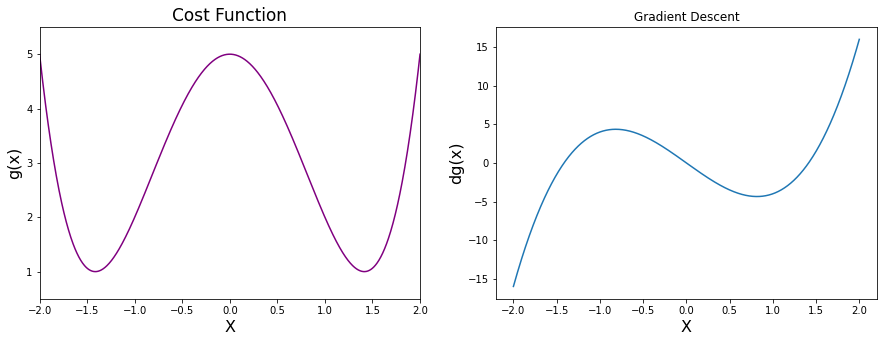

In [13]:
plt.figure(figsize=[15,5])

plt.subplot(121)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='purple')



plt.subplot(122)

plt.title('Gradient Descent')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2))

plt.show()

In [14]:
def gradient_descent(derivative_funct, initial_guess, multiplier=0.02, precision=0.001, iterations=500):
    
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_funct(new_x)]
    
    for n in range(iterations):
        previous_x= new_x
        gradient = derivative_funct(previous_x)
        new_x= previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)

        x_list.append(new_x) #update list
        slope_list.append(derivative_funct(new_x)) #update list

        if step_size < precision:            
            break
    return new_x, x_list, slope_list


In [15]:
local_min, list_x, deriv_list  = gradient_descent(dg, -0.5,0.02, 0.001)
print('Local Min: ',local_min)
print('Steps Min: ',len(list_x))

Local Min:  -1.4122375085019094
Steps Min:  23


In [16]:
local_min, list_x, deriv_list  = gradient_descent(dg, -0.5,0.02, 0.0000000000001)
print('Local Min: ',local_min)
print('Steps Min: ',len(list_x))

Local Min:  -1.4142135623729182
Steps Min:  83


## Plotting gradient descent function 

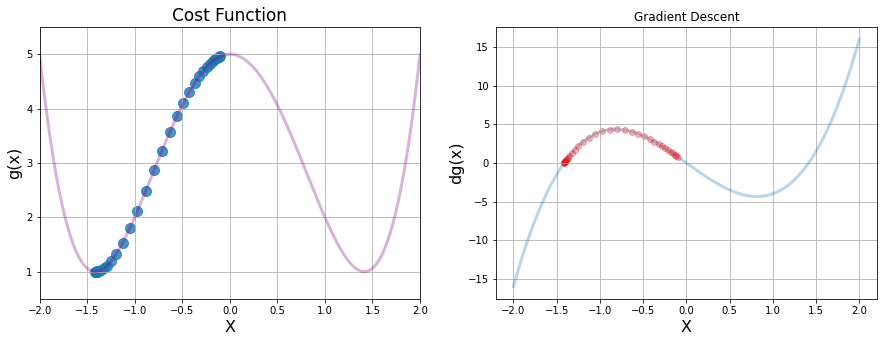

In [17]:
local_min, list_x, deriv_list  = gradient_descent(dg,initial_guess=-0.1)

plt.figure(figsize=[15,5])

plt.subplot(121)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='purple', linewidth=3,alpha=0.3)
array_x= np.array(list_x)
plt.grid()
plt.scatter(list_x, g(array_x), marker='o', alpha=0.8, s=100)



plt.subplot(122)

plt.title('Gradient Descent')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), alpha=0.3, linewidth=3)
plt.scatter(list_x, deriv_list, marker='o', alpha=0.3, color='red')
plt.grid()

plt.show()

## Ex.3  Divergence, overflow and tuples
## $$h(x)=x^{5}-2x^{4}+2$$

In [18]:
x_3= np.linspace(-2.5, 2.5, 1000)

In [19]:
def h(x):
    return x**5 - 2*x**4 +2

In [20]:
def dh(x):
    return 5*(x**4) - 8*(x**3)

local min at:  1.600491652015735
Cost as minimum is: -0.6214375232482041
Steps: 8


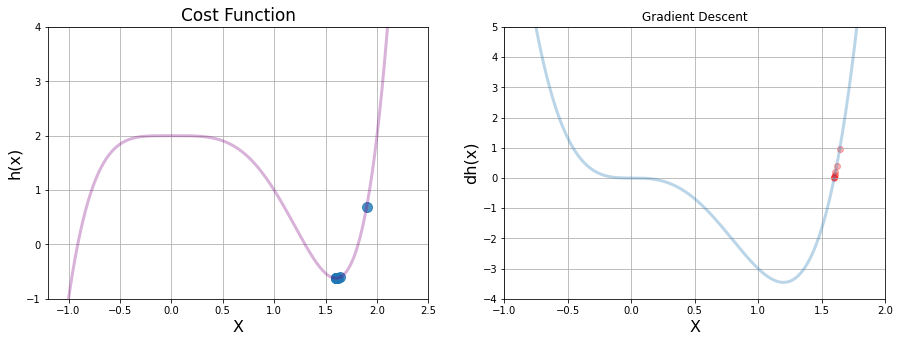

In [21]:
local_min, list_x, deriv_list  = gradient_descent(dh,initial_guess=1.9, iterations=500, multiplier=0.025)

plt.figure(figsize=[15,5])

plt.subplot(121)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)



plt.plot(x_3, h(x_3), color='purple', linewidth=3,alpha=0.3)
array_x= np.array(list_x)

plt.grid()
plt.scatter(list_x, h(array_x), marker='o', alpha=0.8, s=100)



plt.subplot(122)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.title('Gradient Descent')
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3, dh(x_3), alpha=0.3, linewidth=3)
plt.scatter(list_x, deriv_list, marker='o', alpha=0.3, color='red')
plt.grid()
print('local min at: ', local_min)
print('Cost as minimum is:', h(local_min))
print('Steps:', len(list_x))
plt.show()